In [1]:
%run ../../analysis_funcs.py

In [2]:
##Load parameters to check easily
with open("parameters.txt",'r') as fl:
    parameters = fl.readlines()

In [3]:
parameters

['N (number of taxa): 500\n',
 'M (number of samples): 300\n',
 'topN: 1000\n',
 'lam: 0.05 (LASSO parameter lambda for GLASSO)\n',
 'ch: 0 (chunkiness for NormalCowboy)\n',
 'ns: 2 (Number of simualted data types)\n',
 'gsp: 0.05 (approximate sparsity of ground truth)\n',
 'norms: add_pseudocounts (how count data is normalized by the method)\n',
 'grmod: PL (which graph model to base ground truth on)\n',
 'mean_spread: 4 (spread of log-means of absolute abundances)\n',
 'mean_center: 0 (center of uniform distrubition of log-means of absolute abundances)\n',
 'L (number of trials): 15\n',
 'mxvar: 2 (Max variance of absuolute abundances)\n',
 'mnvar: 0.3 (Min variance of absuolute abundances)\n',
 'hubcut (eigenvector centrality cutoff to consider a node a hub for comparison between networks): 0.3\n',
 'average read depth: 100000\n',
 'Standard deviation of read depth: 10000\n',
 'Use Correlation (instead of covariance): False\n']

In [4]:
all_cov,splits = load_all_covariance()

In [5]:
all_cor,splits = load_all_correlation()

In [6]:
cov_rmse = make_RMSE_df(all_cov)

In [7]:
cov_rmse

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
0        0.113307  0.096196  0.086054  0.096013     0.057293     0.044876
1        0.099693  0.092443  0.083365  0.092251     0.052862     0.043553
2        0.103906  0.094705  0.084951  0.094526     0.055868     0.044342
3        0.108641  0.098919  0.084521  0.098737     0.056779     0.044466
4        0.105309  0.093827  0.086068  0.093639     0.048589     0.044829
5        0.096922  0.091267  0.081747   0.09109     0.046634     0.042342
6        0.109308  0.102083  0.090813  0.101885     0.060867     0.047631
7         0.10365  0.096888  0.087998  0.096695     0.056407      0.04635
8        0.099047  0.091447  0.084747  0.091259     0.047468     0.044726
9         0.10485  0.095888  0.085487  0.095721     0.049123     0.044452
10       0.105339  0.095573  0.084671  0.095358      0.05565     0.044846
11       0.115423  0.101226  0.089605  0.101024     0.060308     0.047404
12       0.111952  0.101415  0.091015  0.101208     0.059265     0.048462
13       0.094994  0.089943  0.083689  0.089749     0.046051     0.043301
14       0.108277  0.094339  0.081119  0.094148     0.056213     0.042477

In [8]:
edge_str = make_mean_edge_str_df(all_cov)

Text(0, 0.5, 'Mean Edge Magnitude')

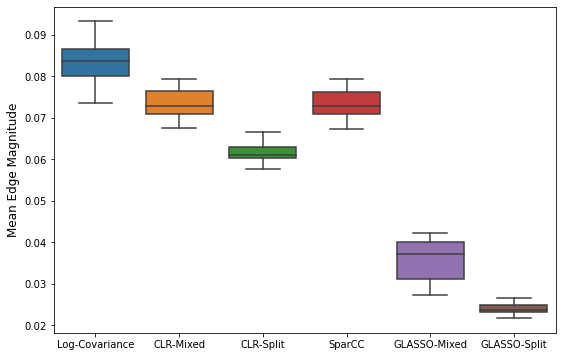

In [9]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data =edge_str,ax=ax)
ax.set_ylabel("Mean Edge Magnitude",size=12)
# ax.set_ylim(0.17,0.43)# ax.set_title("Coefficient of Determination of Linear Regression between True Edges and Fit Edges",size=15)

In [10]:
xk_edge_str = make_XK_mean_edge_str_df(all_cov,splits)

Text(0, 0.5, 'Mean Edge Magnitude')

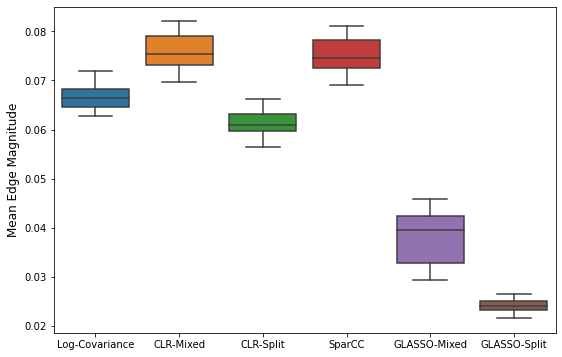

In [11]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data =xk_edge_str,ax=ax)
ax.set_ylabel("Mean Edge Magnitude",size=12)
# ax.set_ylim(0.17,0.43)# ax.set_title("Coefficient of Determination of Linear Regression between True Edges and Fit Edges",size=15)

(0.039, 0.21)

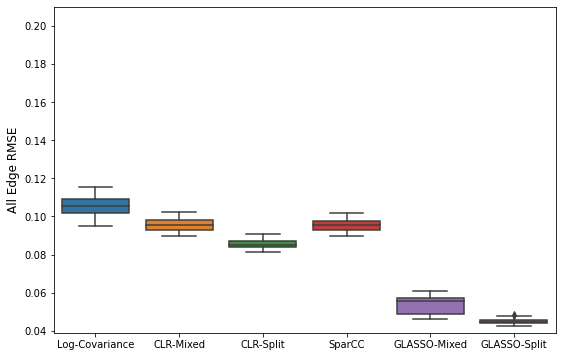

In [12]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data =cov_rmse,ax=ax)
ax.set_ylabel("All Edge RMSE",size=12)
ax.set_ylim(0.039,0.21)

In [13]:
significance_df = pd.DataFrame(index = cov_rmse.columns,columns = cov_rmse.columns)
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(cov_rmse[rw],cov_rmse[col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0  0.000013       0.0   0.00001          0.0   
CLR-Mixed            0.000013       1.0       0.0  0.892212          0.0   
CLR-Split                 0.0       0.0       1.0       0.0          0.0   
SparCC                0.00001  0.892212       0.0       1.0          0.0   
GLASSO-Mixed              0.0       0.0       0.0       0.0          1.0   
GLASSO-Split              0.0       0.0       0.0       0.0     0.000001   

               GLASSO-Split  
Log-Covariance          0.0  
CLR-Mixed               0.0  
CLR-Split               0.0  
SparCC                  0.0  
GLASSO-Mixed       0.000001  
GLASSO-Split            1.0

In [14]:
cov_XK_rmse = make_XK_RMSE_df(all_cov,splits)

In [15]:
cov_XK_rmse

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
0        0.092827  0.100083  0.086762  0.099014     0.060615     0.045385
1        0.088013  0.093991  0.083232   0.09301     0.053741     0.042911
2        0.091095  0.097709  0.085026  0.096574     0.058741     0.044631
3        0.091182  0.101787  0.084939  0.100447     0.058342     0.044049
4        0.091976  0.097351  0.087139   0.09636     0.050702     0.045405
5        0.086822  0.093174  0.081682   0.09218     0.047668     0.042196
6         0.09643   0.10429  0.090246  0.103032     0.062711     0.046874
7        0.092194  0.098368  0.087762  0.097315      0.05714      0.04545
8        0.089428  0.093411  0.084762  0.092548      0.04883     0.044944
9        0.089998   0.09754  0.085228  0.096392     0.049989      0.04415
10       0.089972  0.096913  0.084034  0.095796     0.056289     0.043553
11       0.097117  0.105076  0.090528   0.10385     0.062908     0.047532
12        0.09533   0.10319  0.090768  0.101971       0.0603     0.047651
13       0.088414  0.092581  0.083987  0.091695     0.047704      0.04361
14       0.086468  0.096335  0.079875  0.095122     0.057688     0.041252

(0.039, 0.21)

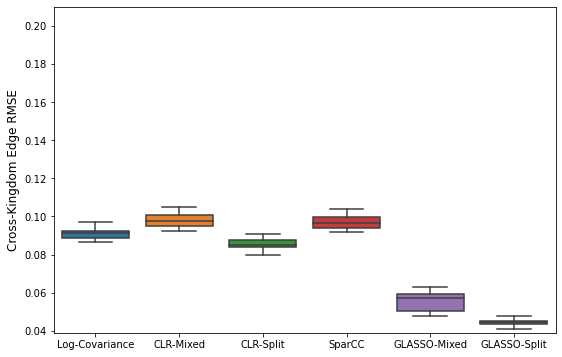

In [16]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data =cov_XK_rmse,ax=ax)
ax.set_ylabel("Cross-Kingdom Edge RMSE",size=12)
ax.set_ylim(0.039,0.21)

In [17]:
significance_df = pd.DataFrame(index = cov_XK_rmse.columns,columns = cov_XK_rmse.columns)
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(cov_XK_rmse[rw],cov_XK_rmse[col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0  0.000017  0.000081  0.000127          0.0   
CLR-Mixed            0.000017       1.0       0.0  0.457178          0.0   
CLR-Split            0.000081       0.0       1.0       0.0          0.0   
SparCC               0.000127  0.457178       0.0       1.0          0.0   
GLASSO-Mixed              0.0       0.0       0.0       0.0          1.0   
GLASSO-Split              0.0       0.0       0.0       0.0          0.0   

               GLASSO-Split  
Log-Covariance          0.0  
CLR-Mixed               0.0  
CLR-Split               0.0  
SparCC                  0.0  
GLASSO-Mixed            0.0  
GLASSO-Split            1.0

In [18]:
coeff_dets = make_coeff_det_df(all_cov)
coeff_dets

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
0        0.313204  0.331784  0.363701   0.33264     0.301577     0.389968
1        0.333718  0.341602  0.369184  0.342731     0.331116      0.40138
2        0.317694  0.329855  0.361475  0.330792      0.30291     0.386956
3        0.326693  0.337749  0.381822  0.338686     0.326186     0.418575
4         0.33549  0.350825  0.371501  0.351799     0.373991     0.403311
5        0.331705  0.340201  0.371254  0.341126     0.363053     0.403844
6        0.326984  0.338136  0.371554  0.339193     0.312457     0.401288
7        0.338952  0.348969  0.375529  0.350065     0.333739     0.404954
8        0.333455  0.344873  0.367511  0.345899     0.366873     0.394874
9        0.314522  0.327663  0.357717  0.328358     0.346583      0.38539
10       0.340705  0.348175  0.383496  0.349632     0.328443     0.413073
11       0.325829  0.344727  0.380447  0.345868     0.324265     0.414807
12       0.336227  0.349133  0.381329  0.350217     0.335567     0.415592
13       0.337426  0.345109  0.364079   0.34626      0.36994      0.39526
14       0.318521   0.33754  0.377941  0.338818     0.315005     0.414683

In [19]:
significance_df = pd.DataFrame(index = coeff_dets.columns,columns = coeff_dets.columns)
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(coeff_dets[rw],coeff_dets[col]).pvalue

In [20]:
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0  0.000324       0.0  0.000136     0.318386   
CLR-Mixed            0.000324       1.0       0.0  0.698129     0.388822   
CLR-Split                 0.0       0.0       1.0       0.0     0.000005   
SparCC               0.000136  0.698129       0.0       1.0     0.308669   
GLASSO-Mixed         0.318386  0.388822  0.000005  0.308669          1.0   
GLASSO-Split              0.0       0.0       0.0       0.0          0.0   

               GLASSO-Split  
Log-Covariance          0.0  
CLR-Mixed               0.0  
CLR-Split               0.0  
SparCC                  0.0  
GLASSO-Mixed            0.0  
GLASSO-Split            1.0

(0.17, 0.43)

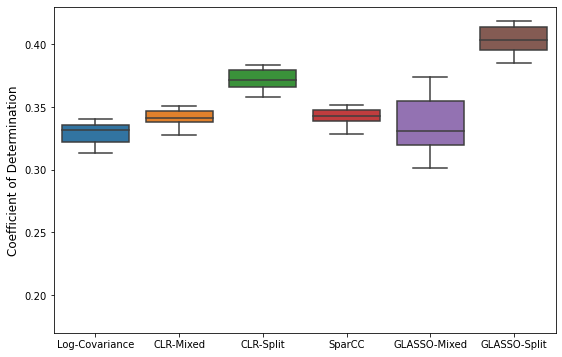

In [21]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data = make_coeff_det_df(all_cov),ax=ax)
ax.set_ylabel("Coefficient of Determination",size=12)
ax.set_ylim(0.17,0.43)# ax.set_title("Coefficient of Determination of Linear Regression between True Edges and Fit Edges",size=15)

In [22]:
coeff_dets_XK = make_XK_coeff_det_df(all_cov,splits)

In [23]:
significance_XK_df = pd.DataFrame(index = coeff_dets_XK.columns,columns = coeff_dets_XK.columns)
for col in significance_XK_df.columns:
    for rw in significance_XK_df.index:
        significance_XK_df.loc[rw,col] = stats.ttest_ind(coeff_dets_XK[rw],coeff_dets_XK[col]).pvalue

In [24]:
significance_XK_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0  0.024644  0.000006   0.02356     0.381698   
CLR-Mixed            0.024644       1.0  0.001951  0.982317      0.50797   
CLR-Split            0.000006  0.001951       1.0  0.002073     0.008991   
SparCC                0.02356  0.982317  0.002073       1.0     0.499343   
GLASSO-Mixed         0.381698   0.50797  0.008991  0.499343          1.0   
GLASSO-Split              0.0       0.0  0.000002       0.0          0.0   

               GLASSO-Split  
Log-Covariance          0.0  
CLR-Mixed               0.0  
CLR-Split          0.000002  
SparCC                  0.0  
GLASSO-Mixed            0.0  
GLASSO-Split            1.0

(0.15, 0.4)

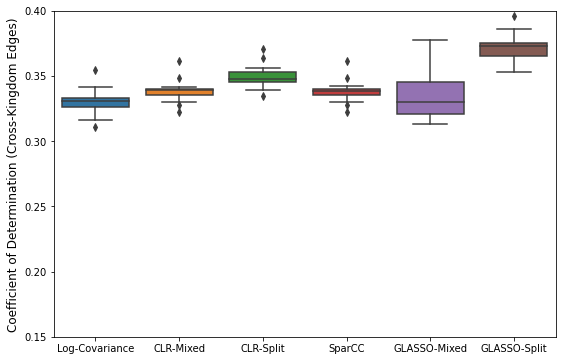

In [25]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data = make_XK_coeff_det_df(all_cov,splits),ax=ax)
ax.set_ylabel("Coefficient of Determination (Cross-Kingdom Edges)",size=12)
ax.set_ylim(0.15,0.4)

In [26]:
coeff_dets_emp = make_coeff_det_df(all_cov,true_column = "Absolute Emperical")

(0.0, 0.2)

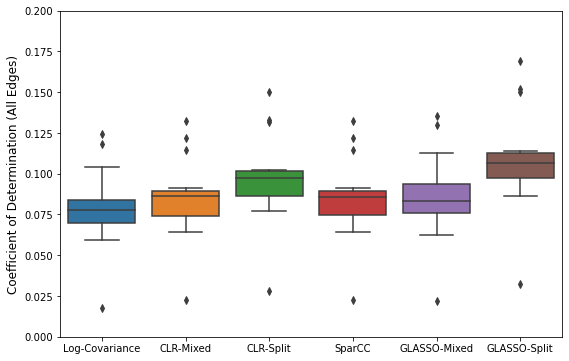

In [27]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data = coeff_dets_emp,ax=ax)
ax.set_ylabel("Coefficient of Determination (All Edges)",size=12)
ax.set_ylim(0,0.2)

In [28]:
coeff_dets_emp_XK = make_XK_coeff_det_df(all_cov,splits,true_column = "Absolute Emperical")

(0.0, 0.2)

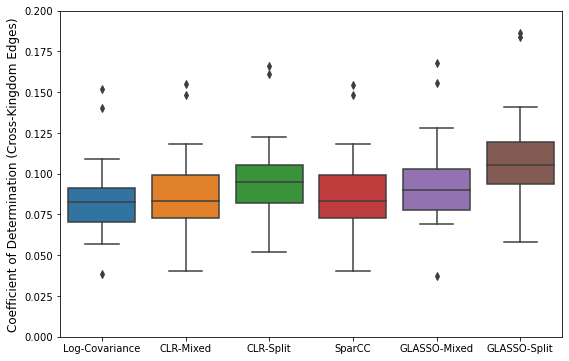

In [29]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data = coeff_dets_emp_XK,ax=ax)
ax.set_ylabel("Coefficient of Determination (Cross-Kingdom Edges)",size=12)
ax.set_ylim(0,0.2)

In [30]:
topacc = all_top_accuracy(all_cov,100)

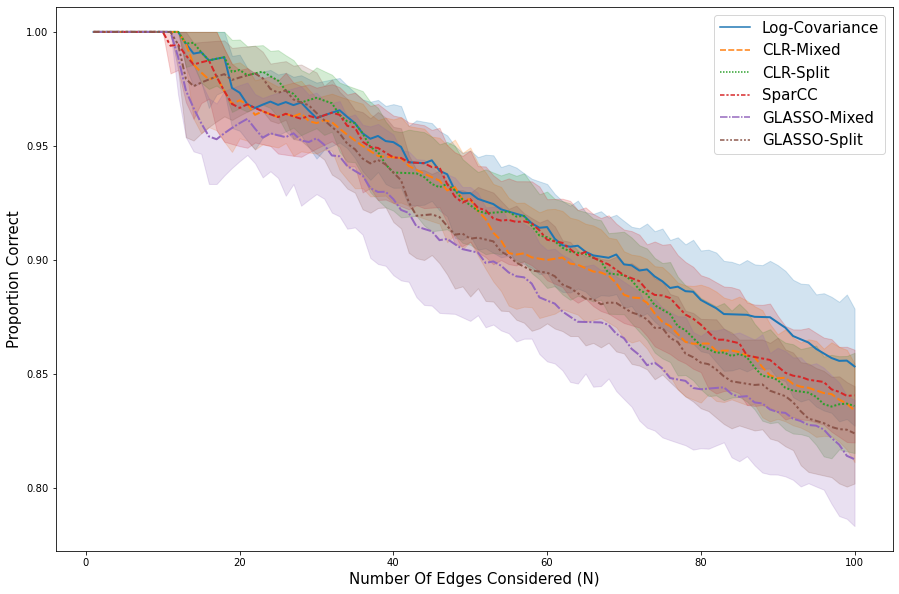

In [31]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = topacc,ax = ax,linewidth=2)
ax.set_ylabel("Proportion Correct",size=15)
ax.set_xlabel("Number Of Edges Considered (N)",size=15)
plt.legend(fontsize=15)

In [32]:
test_net = "GLASSO-Split"
significance_df = pd.DataFrame(index = topacc.index,columns = topacc.columns.unique())
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(topacc.loc[rw,test_net],topacc.loc[rw,col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
1              NaN       NaN       NaN       NaN          NaN          NaN
2              NaN       NaN       NaN       NaN          NaN          NaN
3              NaN       NaN       NaN       NaN          NaN          NaN
4              NaN       NaN       NaN       NaN          NaN          NaN
5              NaN       NaN       NaN       NaN          NaN          NaN
..             ...       ...       ...       ...          ...          ...
96        0.114142  0.432888  0.633132   0.28661     0.885941          1.0
97        0.113803  0.387445  0.596957  0.312789     0.802501          1.0
98        0.119014  0.444177  0.515564  0.317353     0.723687          1.0
99        0.110522  0.496671  0.494404  0.372238     0.555752          1.0
100       0.119587  0.544947  0.475184  0.315549     0.555233          1.0

[100 rows x 6 columns]

<AxesSubplot:>

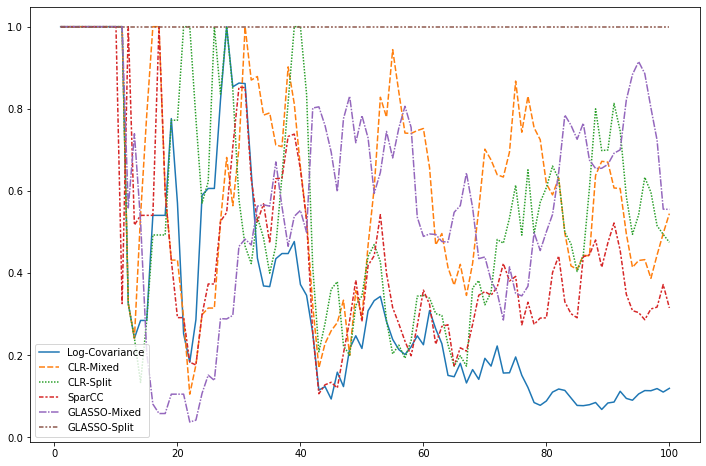

In [33]:
fig,ax = plt.subplots(figsize = (12,8))
sb.lineplot(data = significance_df.fillna(1),ax=ax)

In [34]:
topXKacc = all_top_XK_accuracy(all_cov,splits,100)

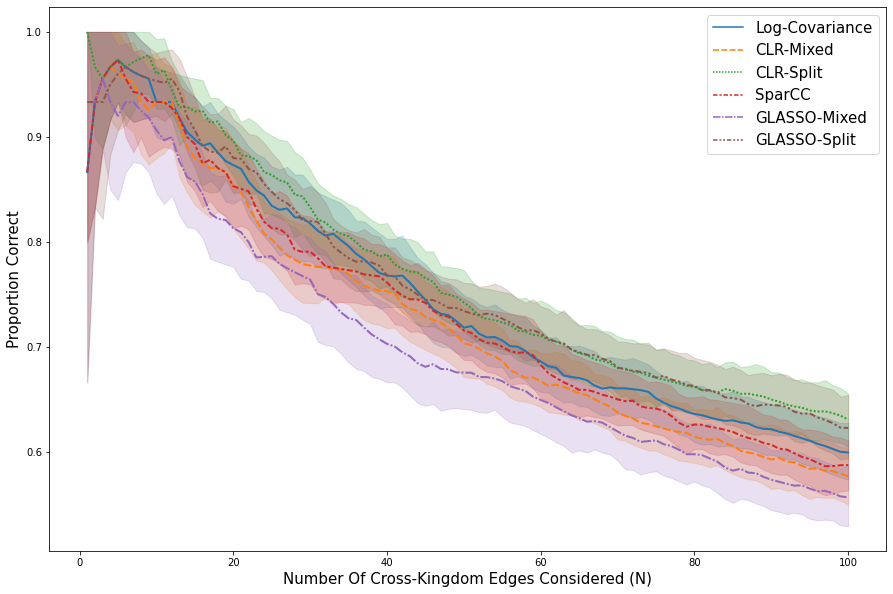

In [35]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = topXKacc,ax = ax,linewidth=2)
ax.set_ylabel("Proportion Correct",size=15)
ax.set_xlabel("Number Of Cross-Kingdom Edges Considered (N)",size=15)
plt.legend(fontsize=15)

In [36]:
test_net = "GLASSO-Split"
significance_df = pd.DataFrame(index = topXKacc.index,columns = topXKacc.columns.unique())
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(topXKacc.loc[rw,test_net],topXKacc.loc[rw,col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
1          0.55886       1.0  0.325875   0.55886          1.0          1.0
2              1.0       1.0   0.55886       1.0          1.0          1.0
3         0.699418  0.699418  0.699418  0.699418     0.699418          1.0
4         0.699418  0.699418  0.699418  0.699418     0.754175          1.0
5         0.699418       1.0  0.699418  0.699418     0.409868          1.0
..             ...       ...       ...       ...          ...          ...
96        0.239648  0.031153  0.794493  0.055387     0.003549          1.0
97        0.240958  0.030631  0.699934  0.051676     0.004076          1.0
98        0.252868  0.038536  0.657952  0.065654     0.004182          1.0
99        0.286185   0.04963    0.5922  0.100243     0.004959          1.0
100       0.268047  0.034933  0.700999   0.09101     0.004752          1.0

[100 rows x 6 columns]

<AxesSubplot:>

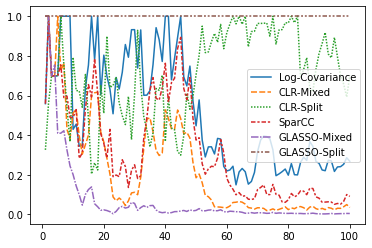

In [37]:
sb.lineplot(data = significance_df.fillna(1))

In [38]:
roc_all_edges = all_classifier_performance_topN(all_cov,-1)

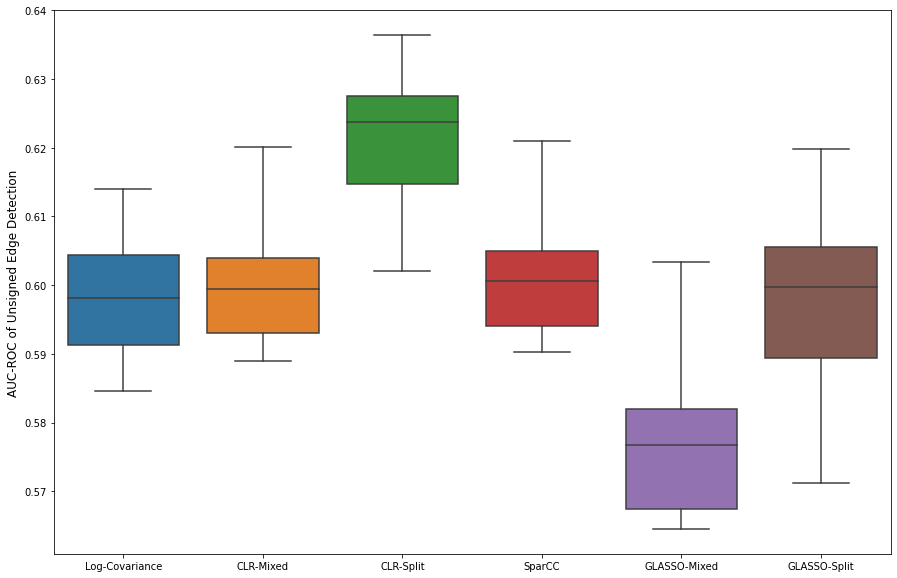

In [39]:
fig,ax = plt.subplots(figsize = (15,10))
sb.boxplot(data = roc_all_edges[0],ax=ax)
ax.set_ylabel("AUC-ROC of Unsigned Edge Detection",size=12);

In [40]:
significance_df = pd.DataFrame(index = roc_all_edges[0].columns,columns = roc_all_edges[0].columns)
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(roc_all_edges[0][rw],roc_all_edges[0][col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0  0.478798       0.0  0.330054     0.000011   
CLR-Mixed            0.478798       1.0  0.000001  0.792505     0.000003   
CLR-Split                 0.0  0.000001       1.0  0.000003          0.0   
SparCC               0.330054  0.792505  0.000003       1.0     0.000001   
GLASSO-Mixed         0.000011  0.000003       0.0  0.000001          1.0   
GLASSO-Split          0.95459   0.60666  0.000005  0.465664     0.000097   

               GLASSO-Split  
Log-Covariance      0.95459  
CLR-Mixed           0.60666  
CLR-Split          0.000005  
SparCC             0.465664  
GLASSO-Mixed       0.000097  
GLASSO-Split            1.0

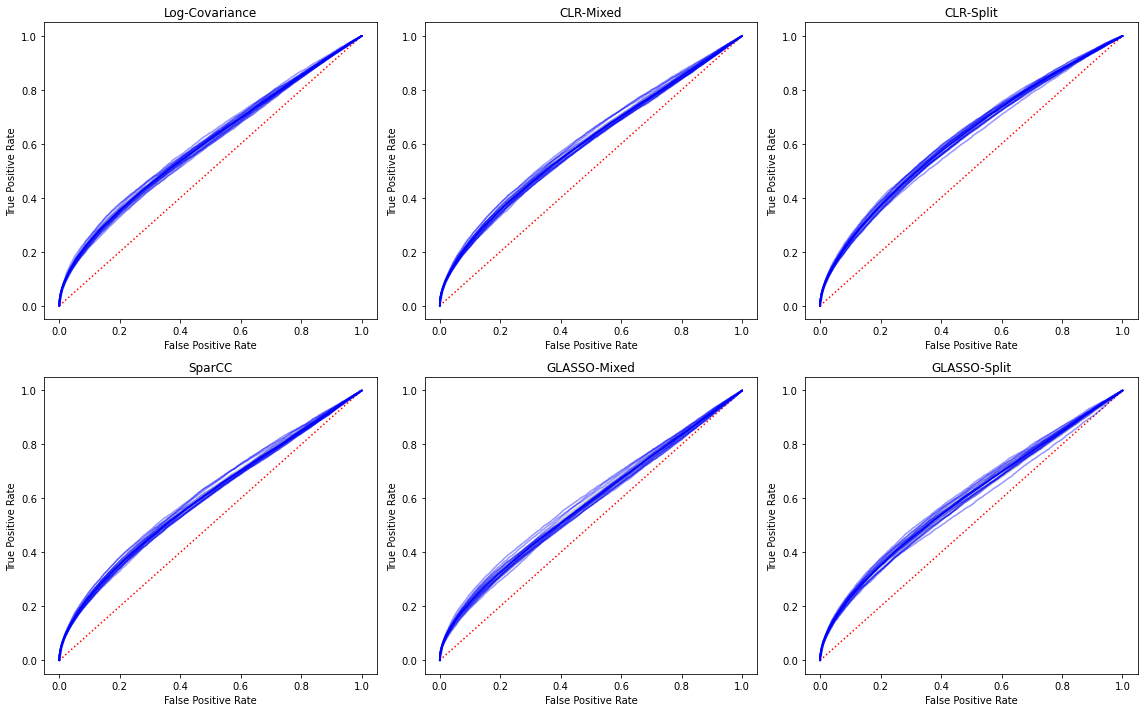

In [41]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    ax[divmod(n,3)].plot([0,1],[0,1],':',color = 'red')
    tprs = []
    for tr in roc_all_edges[1][meth]:
        ax[divmod(n,3)].plot(tr[0],tr[1],color = 'blue',alpha = 0.4)
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax[divmod(n,3)].plot(base_fpr,np.array(tprs).mean(axis = 0),color = 'blue')
    tprs_lower = np.maximum(np.array(tprs).mean(axis = 0) - np.array(tprs).std(axis = 0),0)
    tprs_upper = np.minimum(np.array(tprs).mean(axis = 0) + np.array(tprs).std(axis = 0),1)

    ax[divmod(n,3)].fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    ax[divmod(n,3)].set_xlabel("False Positive Rate")
    ax[divmod(n,3)].set_ylabel("True Positive Rate")
    ax[divmod(n,3)].set_title(meth)

In [42]:
df = make_edge_df(all_cov[0])

In [43]:
(df["Ground Truth"].abs() > 10**-8).sum()

9004

In [44]:
roc_top_edges = all_classifier_performance(all_cov,Ns = np.arange(100,9000,400))

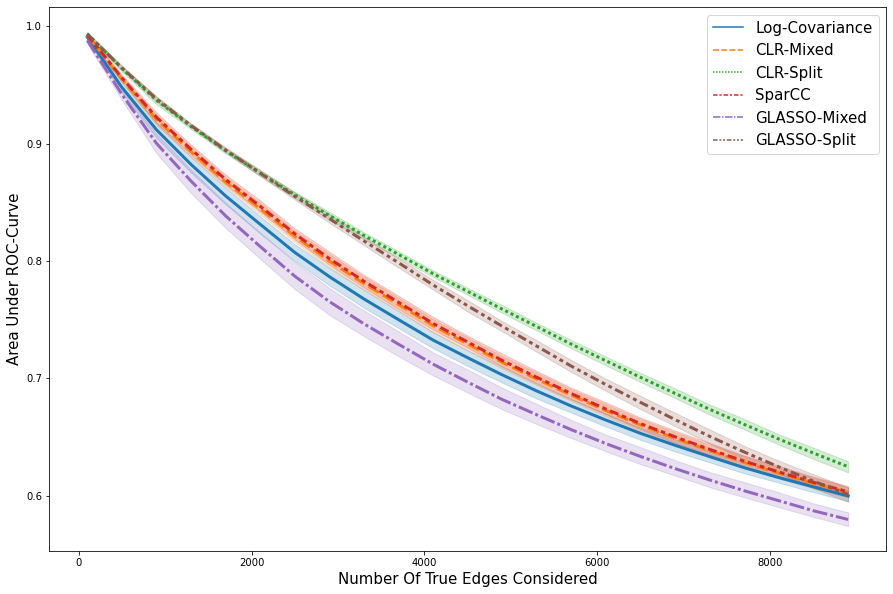

In [45]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = roc_top_edges,ax = ax,linewidth=3)
ax.set_ylabel("Area Under ROC-Curve",size=15)
ax.set_xlabel("Number Of True Edges Considered",size=15)
plt.legend(fontsize=15)

In [46]:
test_net = "GLASSO-Split"
significance_df = pd.DataFrame(index = roc_top_edges.index,columns = roc_top_edges.columns.unique())
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(roc_top_edges.loc[rw,test_net],roc_top_edges.loc[rw,col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
100        0.123595  0.523533   0.85837   0.65989     0.004093          1.0
500        0.000001  0.000007  0.810287  0.000036          0.0          1.0
900             0.0       0.0  0.549893  0.000002          0.0          1.0
1300            0.0       0.0  0.606801       0.0          0.0          1.0
1700            0.0       0.0  0.700937       0.0          0.0          1.0
2100            0.0       0.0  0.916664       0.0          0.0          1.0
2500            0.0       0.0  0.550291       0.0          0.0          1.0
2900            0.0       0.0  0.318253       0.0          0.0          1.0
3300            0.0       0.0  0.069535       0.0          0.0          1.0
3700            0.0       0.0  0.010574       0.0          0.0          1.0
4100            0.0       0.0  0.001081       0.0          0.0          1.0
4500            0.0       0.0  0.000191       0.0          0.0          1.0
4900            0.0       0.0  0.000035       0.0          0.0          1.0
5300            0.0       0.0  0.000016       0.0          0.0          1.0
5700            0.0  0.000001  0.000005  0.000001          0.0          1.0
6100            0.0  0.000004  0.000002  0.000009          0.0          1.0
6500            0.0  0.000041  0.000002  0.000093          0.0          1.0
6900       0.000009  0.000577  0.000001  0.001194          0.0          1.0
7300       0.000234  0.006025  0.000002  0.011469          0.0          1.0
7700       0.002829  0.040149  0.000002  0.068958          0.0          1.0
8100       0.030157  0.199428  0.000002  0.295356     0.000001          1.0
8500       0.229896  0.625827  0.000002   0.80556     0.000004          1.0
8900       0.756395  0.744554  0.000004  0.584774     0.000054          1.0

<AxesSubplot:>

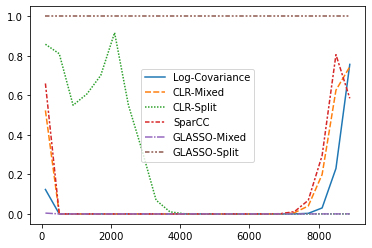

In [47]:
sb.lineplot(data = significance_df.fillna(1))

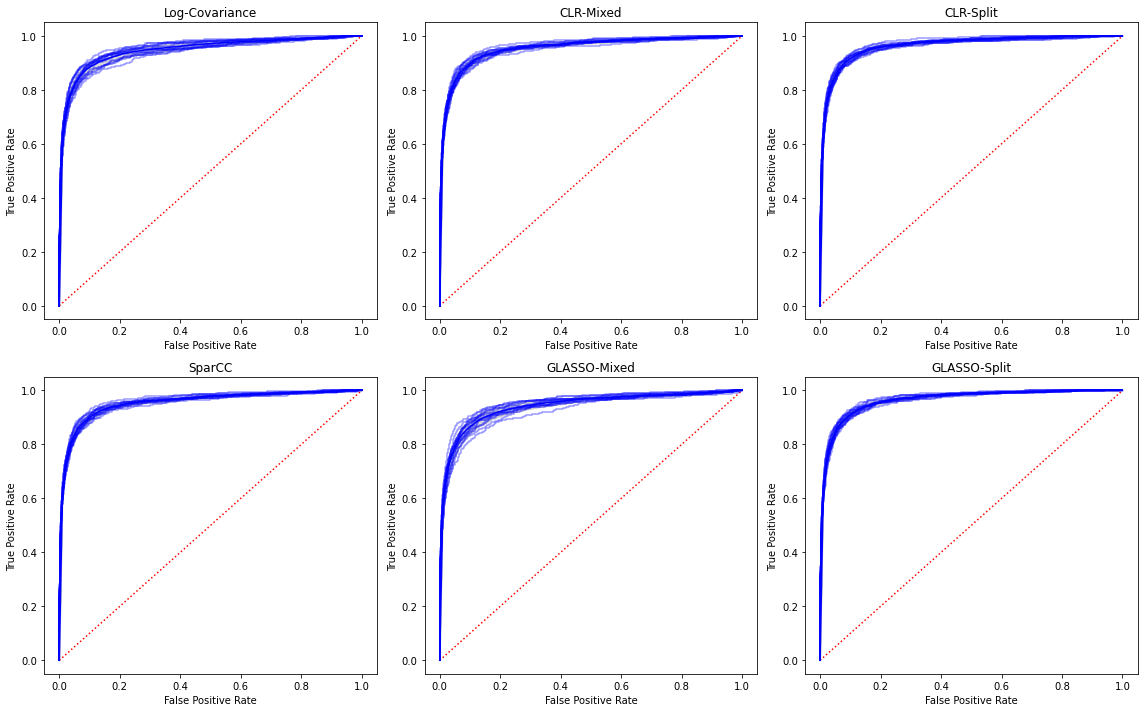

In [48]:
roc_500_edges = all_classifier_performance_topN(all_cov,500)
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    ax[divmod(n,3)].plot([0,1],[0,1],':',color = 'red')
    tprs = []
    for tr in roc_500_edges[1][meth]:
        ax[divmod(n,3)].plot(tr[0],tr[1],color = 'blue',alpha = 0.4)
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax[divmod(n,3)].plot(base_fpr,np.array(tprs).mean(axis = 0),color = 'blue')
    tprs_lower = np.maximum(np.array(tprs).mean(axis = 0) - np.array(tprs).std(axis = 0),0)
    tprs_upper = np.minimum(np.array(tprs).mean(axis = 0) + np.array(tprs).std(axis = 0),1)

    ax[divmod(n,3)].fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    ax[divmod(n,3)].set_xlabel("False Positive Rate")
    ax[divmod(n,3)].set_ylabel("True Positive Rate")
    ax[divmod(n,3)].set_title(meth)

In [49]:
XK_roc_all_edges = all_XK_classifier_performance_topN(all_cov,splits,-1)

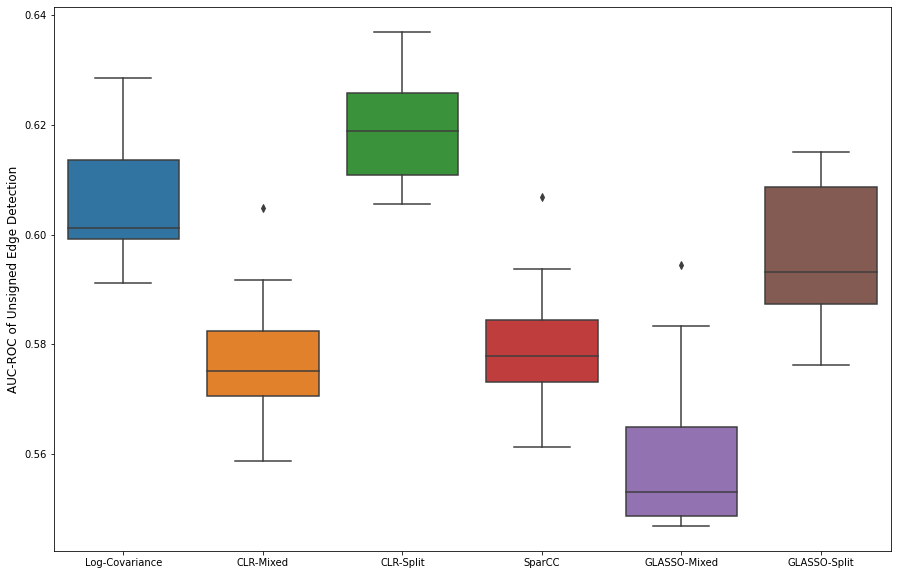

In [50]:
fig,ax = plt.subplots(figsize = (15,10))
sb.boxplot(data = XK_roc_all_edges[0],ax=ax)
ax.set_ylabel("AUC-ROC of Unsigned Edge Detection",size = 12);

In [51]:
significance_df = pd.DataFrame(index = XK_roc_all_edges[0].columns,columns = XK_roc_all_edges[0].columns)
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(XK_roc_all_edges[0][rw],XK_roc_all_edges[0][col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0       0.0  0.001303  0.000001          0.0   
CLR-Mixed                 0.0       1.0       0.0  0.563094     0.000742   
CLR-Split            0.001303       0.0       1.0       0.0          0.0   
SparCC               0.000001  0.563094       0.0       1.0      0.00017   
GLASSO-Mixed              0.0  0.000742       0.0   0.00017          1.0   
GLASSO-Split         0.044976  0.000148  0.000009  0.000588          0.0   

               GLASSO-Split  
Log-Covariance     0.044976  
CLR-Mixed          0.000148  
CLR-Split          0.000009  
SparCC             0.000588  
GLASSO-Mixed            0.0  
GLASSO-Split            1.0

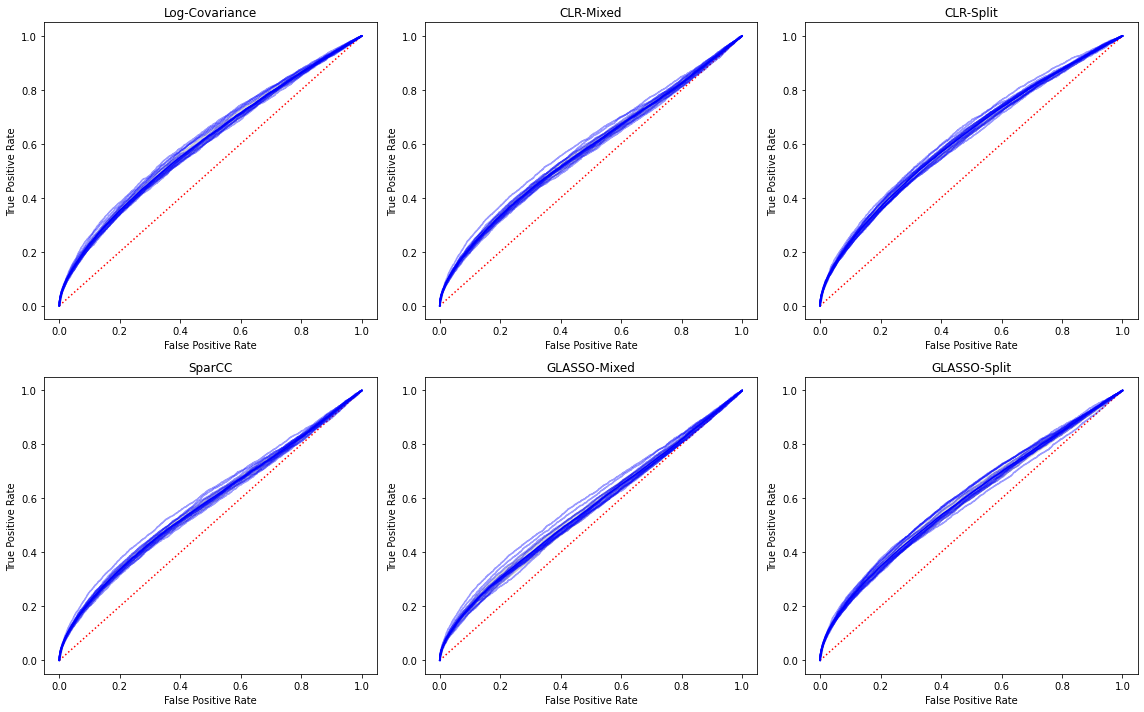

In [52]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    ax[divmod(n,3)].plot([0,1],[0,1],':',color = 'red')
    tprs = []
    for tr in XK_roc_all_edges[1][meth]:
        ax[divmod(n,3)].plot(tr[0],tr[1],color = 'blue',alpha = 0.4)
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax[divmod(n,3)].plot(base_fpr,np.array(tprs).mean(axis = 0),color = 'blue')
    tprs_lower = np.maximum(np.array(tprs).mean(axis = 0) - np.array(tprs).std(axis = 0),0)
    tprs_upper = np.minimum(np.array(tprs).mean(axis = 0) + np.array(tprs).std(axis = 0),1)

    ax[divmod(n,3)].fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    ax[divmod(n,3)].set_xlabel("False Positive Rate")
    ax[divmod(n,3)].set_ylabel("True Positive Rate")
    ax[divmod(n,3)].set_title(meth)

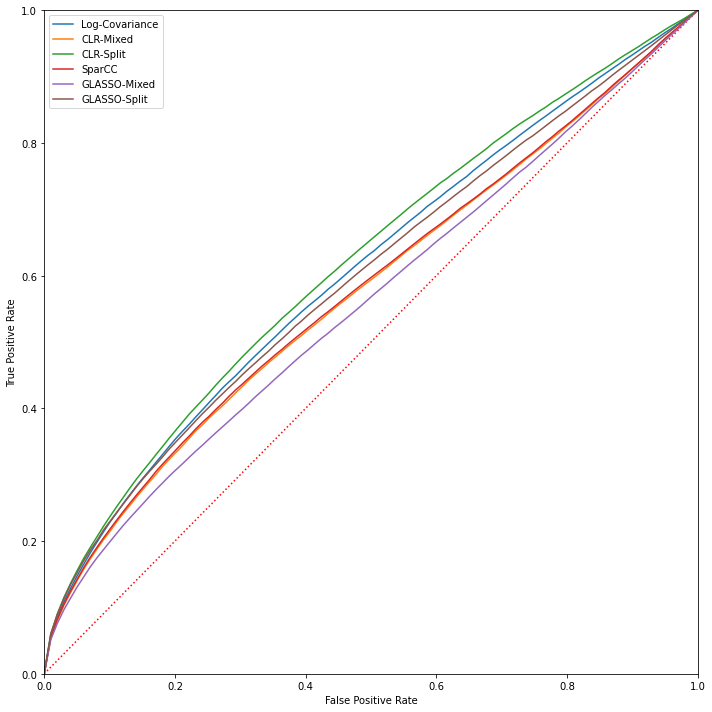

In [53]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)
ax.plot([0,1],[0,1],':',color = 'red')

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    tprs = []
    for tr in XK_roc_all_edges[1][meth]:
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax.plot(base_fpr,np.array(tprs).mean(axis = 0),label=meth)

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.legend()

In [54]:
XK_roc_top_edges = all_XK_classifier_performance(all_cov,splits,Ns = np.arange(50,3950,100))

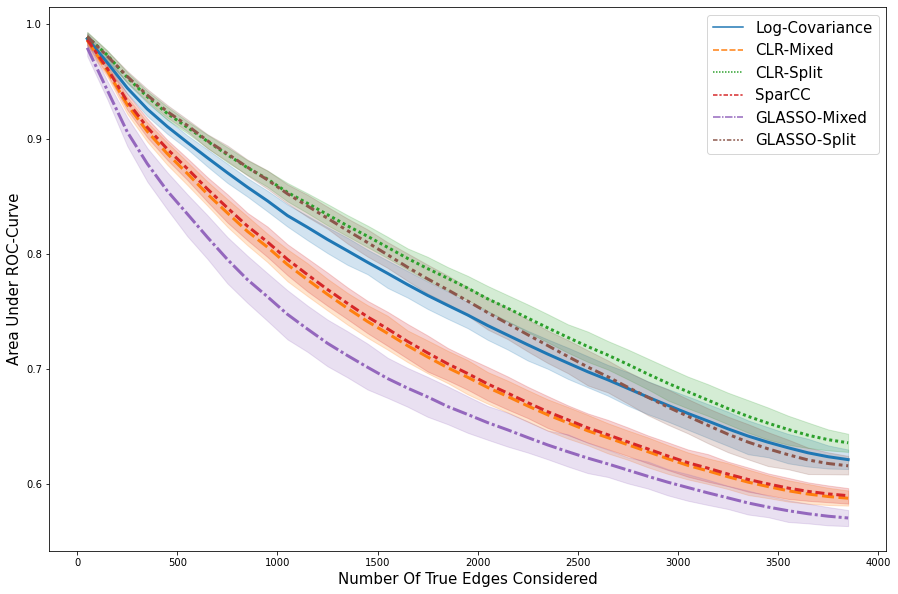

In [55]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = XK_roc_top_edges,ax = ax,linewidth=3)
ax.set_ylabel("Area Under ROC-Curve",size = 15)
ax.set_xlabel("Number Of True Edges Considered",size = 15)
plt.legend(fontsize=15)

In [56]:
test_net = "GLASSO-Split"
significance_df = pd.DataFrame(index = XK_roc_top_edges.index,columns = XK_roc_top_edges.columns.unique())
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(XK_roc_top_edges.loc[rw,test_net],XK_roc_top_edges.loc[rw,col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
50          0.60176  0.371728  0.953677  0.459387     0.021971          1.0
150        0.129298  0.002128  0.794054  0.007423     0.000002          1.0
250        0.008207   0.00001  0.770671  0.000039          0.0          1.0
350        0.007302  0.000003  0.722628  0.000012          0.0          1.0
450        0.006385  0.000001  0.698095  0.000004          0.0          1.0
550        0.001518       0.0  0.675944       0.0          0.0          1.0
650        0.006391       0.0  0.917389  0.000001          0.0          1.0
750        0.007243       0.0  0.858691       0.0          0.0          1.0
850        0.004778       0.0  0.938881       0.0          0.0          1.0
950        0.007086       0.0  0.907904       0.0          0.0          1.0
1050       0.008578       0.0  0.842853       0.0          0.0          1.0
1150       0.018255       0.0  0.735832       0.0          0.0          1.0
1250       0.025986       0.0  0.664099       0.0          0.0          1.0
1350       0.042725       0.0  0.589515       0.0          0.0          1.0
1450       0.050459       0.0  0.490457       0.0          0.0          1.0
1550       0.075593       0.0  0.427315  0.000001          0.0          1.0
1650       0.097522       0.0   0.36053       0.0          0.0          1.0
1750       0.122869       0.0  0.301543  0.000001          0.0          1.0
1850       0.145028       0.0  0.244563  0.000001          0.0          1.0
1950       0.202963       0.0  0.208975  0.000001          0.0          1.0
2050       0.258382  0.000001  0.208133  0.000002          0.0          1.0
2150       0.320138  0.000001  0.169491  0.000003          0.0          1.0
2250       0.393899  0.000002  0.145437  0.000004          0.0          1.0
2350       0.482133  0.000003  0.133429  0.000007          0.0          1.0
2450        0.59618  0.000007  0.115957  0.000015          0.0          1.0
2550       0.701999  0.000011  0.093499  0.000022          0.0          1.0
2650       0.806002  0.000021  0.080624  0.000042          0.0          1.0
2750       0.925068  0.000045  0.069531  0.000088          0.0          1.0
2850       0.987604    0.0001  0.070111   0.00019          0.0          1.0
2950       0.893423  0.000161  0.065093    0.0003     0.000001          1.0
3050       0.822647  0.000251  0.058695  0.000468     0.000001          1.0
3150        0.73864  0.000524  0.054366  0.000973     0.000002          1.0
3250       0.678243  0.000953  0.051966  0.001748     0.000005          1.0
3350       0.639341  0.001438  0.049213  0.002625     0.000007          1.0
3450       0.587865  0.001366  0.039246  0.002583     0.000006          1.0
3550        0.53732  0.000979  0.028641  0.001968     0.000003          1.0
3650       0.477315  0.000541  0.017567  0.001185     0.000001          1.0
3750       0.429908   0.00013    0.0079  0.000327          0.0          1.0
3850       0.392267  0.000018   0.00233  0.000053          0.0          1.0

<AxesSubplot:>

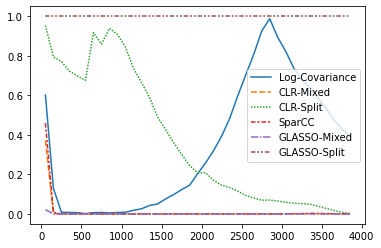

In [57]:
sb.lineplot(data = significance_df.fillna(1))

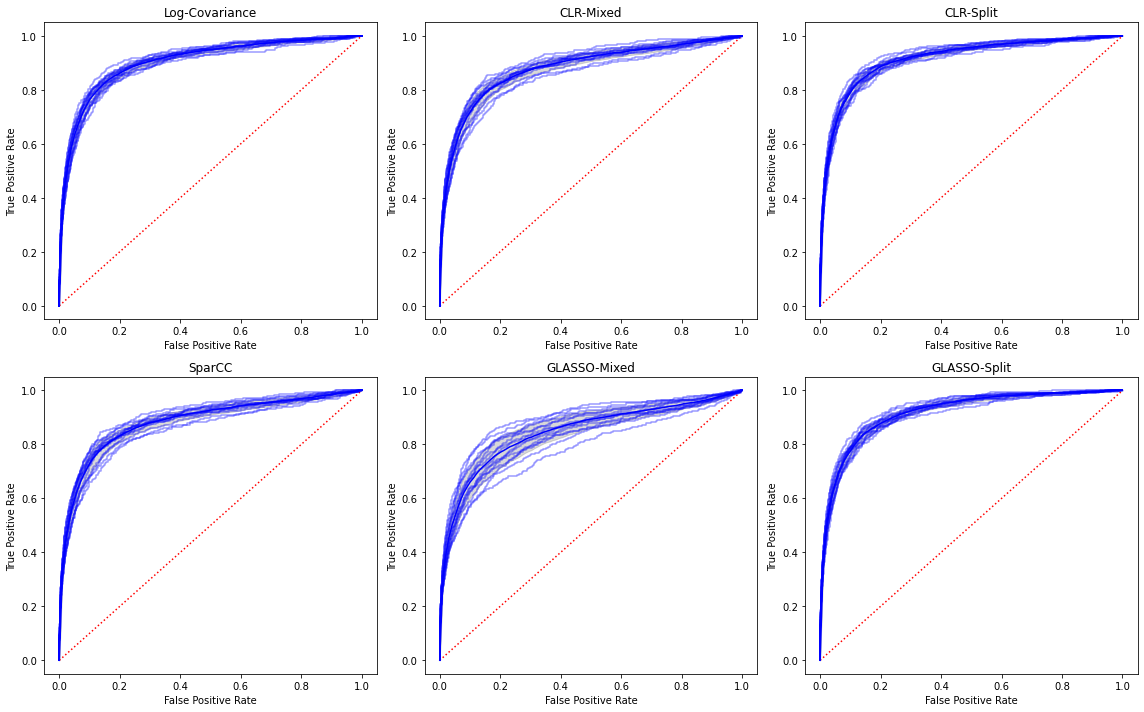

In [58]:
XK_roc_500_edges = all_XK_classifier_performance_topN(all_cov,splits,500)
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    ax[divmod(n,3)].plot([0,1],[0,1],':',color = 'red')
    tprs = []
    for tr in XK_roc_500_edges[1][meth]:
        ax[divmod(n,3)].plot(tr[0],tr[1],color = 'blue',alpha = 0.4)
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax[divmod(n,3)].plot(base_fpr,np.array(tprs).mean(axis = 0),color = 'blue')
    tprs_lower = np.maximum(np.array(tprs).mean(axis = 0) - np.array(tprs).std(axis = 0),0)
    tprs_upper = np.minimum(np.array(tprs).mean(axis = 0) + np.array(tprs).std(axis = 0),1)

    ax[divmod(n,3)].fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    ax[divmod(n,3)].set_xlabel("False Positive Rate")
    ax[divmod(n,3)].set_ylabel("True Positive Rate")
    ax[divmod(n,3)].set_title(meth)

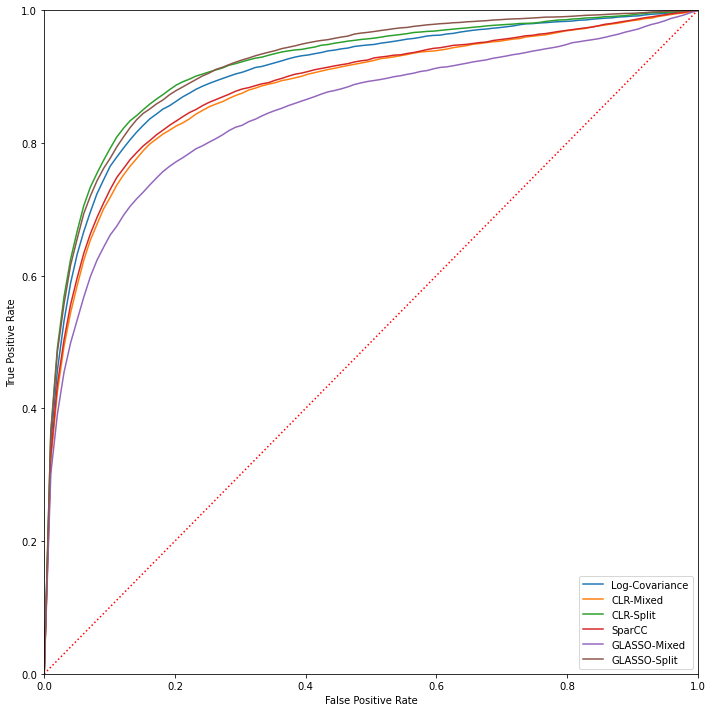

In [59]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)
ax.plot([0,1],[0,1],':',color = 'red')

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    tprs = []
    for tr in XK_roc_500_edges[1][meth]:
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax.plot(base_fpr,np.array(tprs).mean(axis = 0),label=meth)

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.legend()

In [60]:
roc_all_hubs = all_hub_performance_topN(all_cov,N=-1,hubct = 0.5)

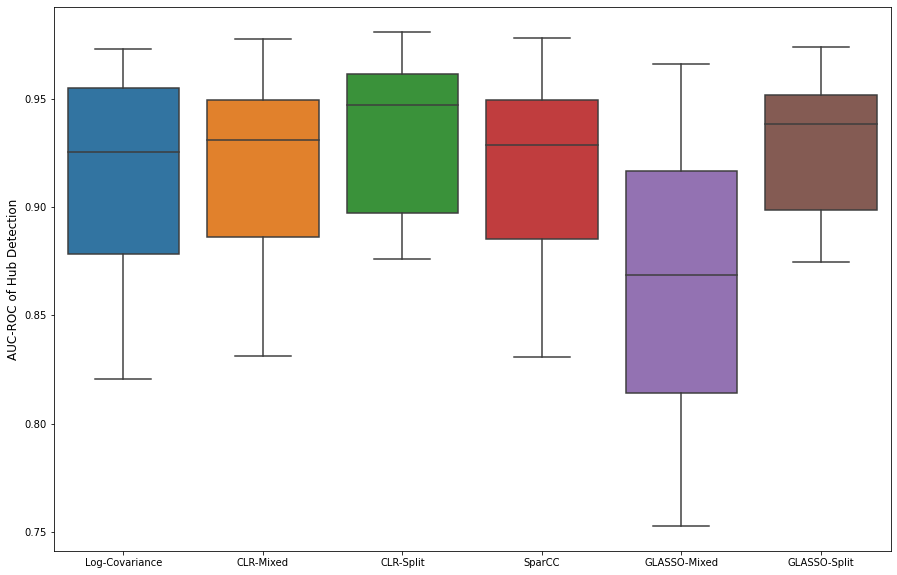

In [61]:
fig,ax = plt.subplots(figsize = (15,10))
sb.boxplot(data = roc_all_hubs[0],ax=ax)
ax.set_ylabel("AUC-ROC of Hub Detection",size = 12);

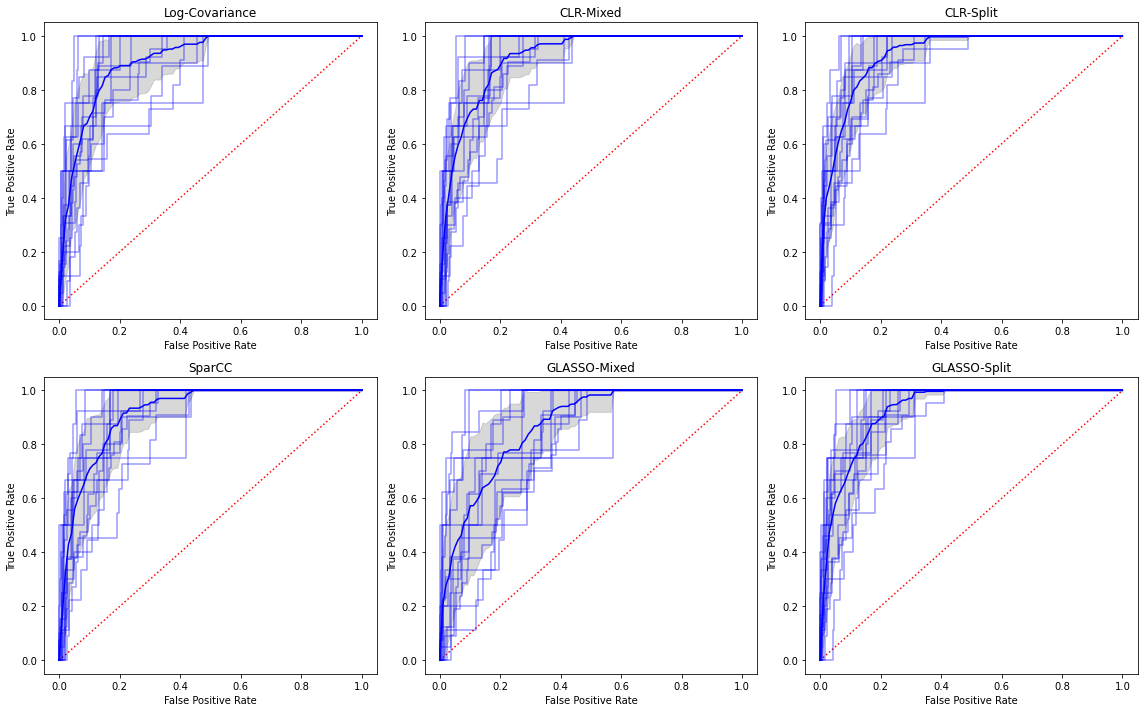

In [62]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    ax[divmod(n,3)].plot([0,1],[0,1],':',color = 'red')
    tprs = []
    for tr in roc_all_hubs[1][meth]:
        ax[divmod(n,3)].plot(tr[0],tr[1],color = 'blue',alpha = 0.4)
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax[divmod(n,3)].plot(base_fpr,np.array(tprs).mean(axis = 0),color = 'blue')
    tprs_lower = np.maximum(np.array(tprs).mean(axis = 0) - np.array(tprs).std(axis = 0),0)
    tprs_upper = np.minimum(np.array(tprs).mean(axis = 0) + np.array(tprs).std(axis = 0),1)

    ax[divmod(n,3)].fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    ax[divmod(n,3)].set_xlabel("False Positive Rate")
    ax[divmod(n,3)].set_ylabel("True Positive Rate")
    ax[divmod(n,3)].set_title(meth)

In [63]:
roc_top_hubs_val = all_hub_performance_byval(all_cov,cuts = np.linspace(0.1,0.99,20))
roc_top_hubs_val

Log-Covariance  Log-Covariance  Log-Covariance  Log-Covariance  \
0.100000        0.868841        0.862149        0.874678        0.894302   
0.146842        0.815805        0.862291        0.876642        0.891272   
0.193684        0.825181        0.864362        0.864089        0.863848   
0.240526        0.809559        0.854010        0.868835        0.839607   
0.287368        0.804044        0.868687        0.865130        0.835897   
0.334211        0.823438        0.900646        0.878004        0.827586   
0.381053        0.837251        0.917695        0.890066        0.859200   
0.427895        0.836587        0.920059        0.896485        0.892577   
0.474737        0.819796        0.900430        0.891200        0.899656   
0.521579        0.797450        0.938279        0.920325        0.900615   
0.568421        0.811492        0.929487        0.911230        0.922662   
0.615263        1.000000        0.929487        0.941837        0.916723   
0.662105        1.000000        0.922828        0.930640        0.934949   
0.708947        1.000000        0.903730        0.930640        0.931956   
0.755789        1.000000        0.940979        0.922065        0.929577   
0.802632        1.000000        0.940979        0.922379        0.935872   
0.849474        1.000000        0.910643        0.988956        0.935872   
0.896316        1.000000        0.929860        0.988956        0.935872   
0.943158        1.000000        0.929860        0.988956        0.935872   
0.990000        1.000000        0.929860        1.000000        0.935872   

          Log-Covariance  Log-Covariance  Log-Covariance  Log-Covariance  \
0.100000        0.894871        0.892123        0.802041        0.898979   
0.146842        0.865149        0.856476        0.795847        0.896216   
0.193684        0.835021        0.830136        0.821927        0.878479   
0.240526        0.845381        0.847058        0.832586        0.895133   
0.287368        0.882353        0.875311        0.837151        0.922897   
0.334211        0.902232        0.900337        0.860816        0.921206   
0.381053        0.931189        0.891194        0.847307        0.915789   
0.427895        0.935038        0.926873        0.949698        0.929347   
0.474737        0.961460        0.908533        0.949698        0.946644   
0.521579        0.970648        0.925549        0.949698        0.938448   
0.568421        0.970648        0.918016        0.949698        0.948933   
0.615263        0.962828        0.956653        0.949698        0.983838   
0.662105        0.962828        0.970490        0.949698        0.980343   
0.708947        0.967807        0.970490        0.949698        0.989940   
0.755789        0.967807        0.970490        0.949698        0.989940   
0.802632        0.961924        0.975904        0.949698        1.000000   
0.849474        0.961924        0.975904        0.949698        1.000000   
0.896316        0.961924        0.959920        0.932731        1.000000   
0.943158        0.961924        0.959920        0.987976        1.000000   
0.990000        0.961924        0.959920        0.987976        1.000000   

          Log-Covariance  Log-Covariance  ...  GLASSO-Split  GLASSO-Split  \
0.100000        0.905540        0.856114  ...      0.908696      0.842810   
0.146842        0.899000        0.849997  ...      0.880596      0.849994   
0.193684        0.883942        0.863121  ...      0.854726      0.876126   
0.240526        0.907236        0.853791  ...      0.872841      0.898785   
0.287368        0.907599        0.819969  ...      0.895922      0.902859   
0.334211        0.912458        0.795359  ...      0.926886      0.922245   
0.381053        0.906714        0.798812  ...      0.914478      0.905996   
0.427895        0.903162        0.841564  ...      0.948041      0.954393   
0.474737        0.926460        0.829064  ...      0.934560      0.954393   
0.521579        0.960196        0.807347  ... 

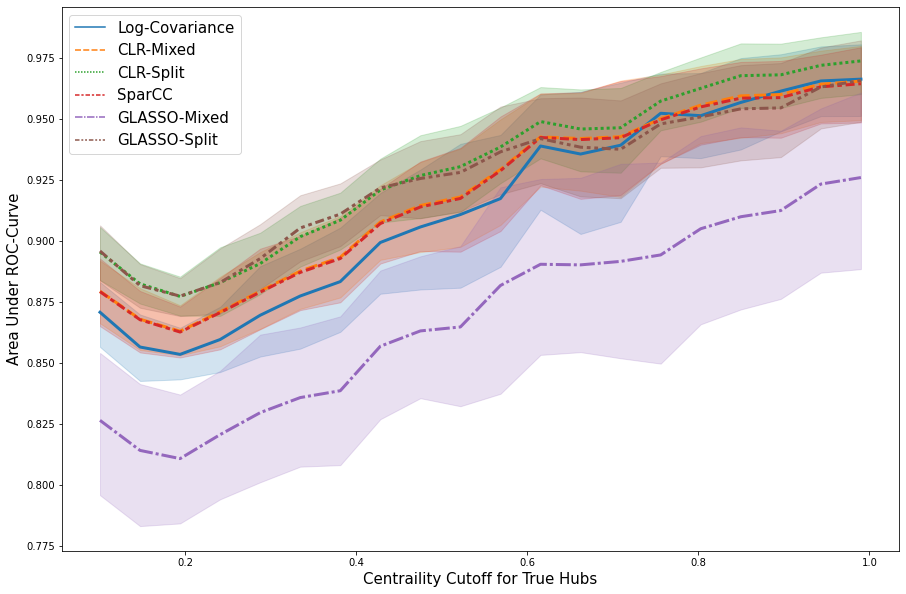

In [81]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = roc_top_hubs_val,ax = ax,linewidth=3)
ax.set_ylabel("Area Under ROC-Curve",size = 15)
ax.set_xlabel("Centraility Cutoff for True Hubs",size = 15)
plt.legend(fontsize=15)

In [82]:
test_net = "GLASSO-Split"
significance_df = pd.DataFrame(index = roc_top_hubs_val.astype('float').index,columns = roc_top_hubs_val.astype('float').columns.unique())
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(roc_top_hubs_val.astype('float').loc[rw,test_net],roc_top_hubs_val.astype('float').loc[rw,col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
0.100000       0.010896   0.08353  0.959191  0.080353     0.000349   
0.146842       0.007933  0.104243  0.910339  0.100775      0.00022   
0.193684       0.001852  0.046754  0.983356   0.04356     0.000082   
0.240526       0.031987  0.266971  0.997696    0.2556     0.000491   
0.287368       0.062884  0.236436  0.838362  0.223238     0.001192   
0.334211       0.038361  0.123843  0.717854  0.114151     0.000365   
0.381053       0.042538  0.126667  0.786761  0.118217     0.000409   
0.427895       0.091208  0.172112  0.923526  0.156192     0.000525   
0.474737       0.206006  0.385099  0.920888  0.361434     0.001762   
0.521579       0.331656  0.475683  0.850053  0.450319     0.002793   
0.568421       0.294563  0.645619  0.881375  0.622853     0.028011   
0.615263       0.851324  0.960098  0.561339  0.973083     0.027747   
0.662105       0.886777  0.822348  0.614553  0.845801     0.037495   
0.708947       0.929236  0.751827  0.531024  0.774147     0.058935   
0.755789       0.732864  0.872908  0.423696  0.899831     0.032207   
0.802632       0.971796  0.712847     0.349  0.755734     0.055479   
0.849474       0.853552  0.686885  0.275436  0.740487     0.072343   
0.896316       0.598515   0.67994  0.282512  0.751353     0.054081   
0.943158       0.836164  0.924846  0.435385  0.995329     0.056902   
0.990000       0.965102  0.982791   0.48828  0.914152     0.063853   

         GLASSO-Split  
0.100000          1.0  
0.146842          1.0  
0.193684          1.0  
0.240526          1.0  
0.287368          1.0  
0.334211          1.0  
0.381053          1.0  
0.427895          1.0  
0.474737          1.0  
0.521579          1.0  
0.568421          1.0  
0.615263          1.0  
0.662105          1.0  
0.708947          1.0  
0.755789          1.0  
0.802632          1.0  
0.849474          1.0  
0.896316          1.0  
0.943158          1.0  
0.990000          1.0

<AxesSubplot:>

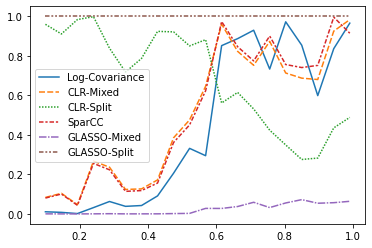

In [83]:
sb.lineplot(data = significance_df.fillna(1))

In [65]:
roc_top_hubs_N = all_hub_performance_byN(all_cov,Ns = np.arange(5,105,5))
roc_top_hubs_N

Log-Covariance  Log-Covariance  Log-Covariance  Log-Covariance  \
5          0.811492        0.903730        0.922379        0.931956   
10         0.826205        0.900430        0.938448        0.916723   
15         0.836714        0.917695        0.912845        0.894621   
20         0.819127        0.900646        0.897582        0.894190   
25         0.798582        0.861695        0.891282        0.852591   
30         0.805916        0.848305        0.890402        0.827586   
35         0.813115        0.848649        0.906715        0.827758   
40         0.807609        0.859058        0.894488        0.829857   
45         0.809559        0.870265        0.890799        0.832237   
50         0.811847        0.853885        0.878004        0.829676   
55         0.821666        0.864807        0.850648        0.838357   
60         0.814097        0.863100        0.856336        0.850648   
65         0.819596        0.860629        0.857798        0.844753   
70         0.817849        0.871583        0.864790        0.843909   
75         0.825181        0.864992        0.868925        0.855221   
80         0.818966        0.860579        0.872846        0.861902   
85         0.829613        0.864612        0.867674        0.870278   
90         0.837065        0.861040        0.868914        0.862681   
95         0.817551        0.861728        0.869039        0.860078   
100        0.818434        0.859568        0.863170        0.862289   

     Log-Covariance  Log-Covariance  Log-Covariance  Log-Covariance  \
5          0.962702        0.956653        0.916835        0.980343   
10         0.952704        0.925549        0.849513        0.938448   
15         0.935038        0.924603        0.832158        0.928865   
20         0.934457        0.912025        0.832586        0.912901   
25         0.920168        0.891194        0.826768        0.928659   
30         0.876858        0.896625        0.820485        0.918662   
35         0.882353        0.885698        0.800050        0.909177   
40         0.889705        0.887035        0.808944        0.919517   
45         0.858652        0.881031        0.794408        0.918810   
50         0.829992        0.871261        0.796688        0.913978   
55         0.834579        0.859409        0.804227        0.897941   
60         0.817364        0.853876        0.791614        0.892848   
65         0.820205        0.843499        0.803541        0.886755   
70         0.833552        0.840075        0.802011        0.887219   
75         0.840154        0.835998        0.782674        0.876951   
80         0.832617        0.836074        0.797799        0.879461   
85         0.841203        0.837254        0.798850        0.886103   
90         0.845841        0.834687        0.807841        0.888761   
95         0.845535        0.834137        0.813908        0.886883   
100        0.852238        0.836797        0.805763        0.890602   

     Log-Covariance  Log-Covariance  ...  GLASSO-Split  GLASSO-Split  \
5          0.941532        0.767641  ...      0.971270      0.947581   
10         0.958588        0.832089  ...      0.951799      0.913103   
15         0.946796        0.841564  ...      0.945914      0.906966   
20         0.903162        0.781705  ...      0.933472      0.898785   
25         0.904587        0.804184  ...      0.914478      0.887868   
30         0.908632        0.800717  ...      0.920346      0.880372   
35         0.907599        0.789447  ...      0.914605      0.865249   
40         0.918238        0.819456  ...      0.904444      0.870571   
45         0.910237        0.829595  ...      0.900020      0.849980   
50         0.907236        0.844246  ...      0.888637      0.850627   
55         0.903214        0.849028  ...      0.880709      0.856959   
60         0.898497        0.847189  ...      0.873900      0.847688   
65         0.906680        0.849341  ...      0.867904      0.855684   
70         0.

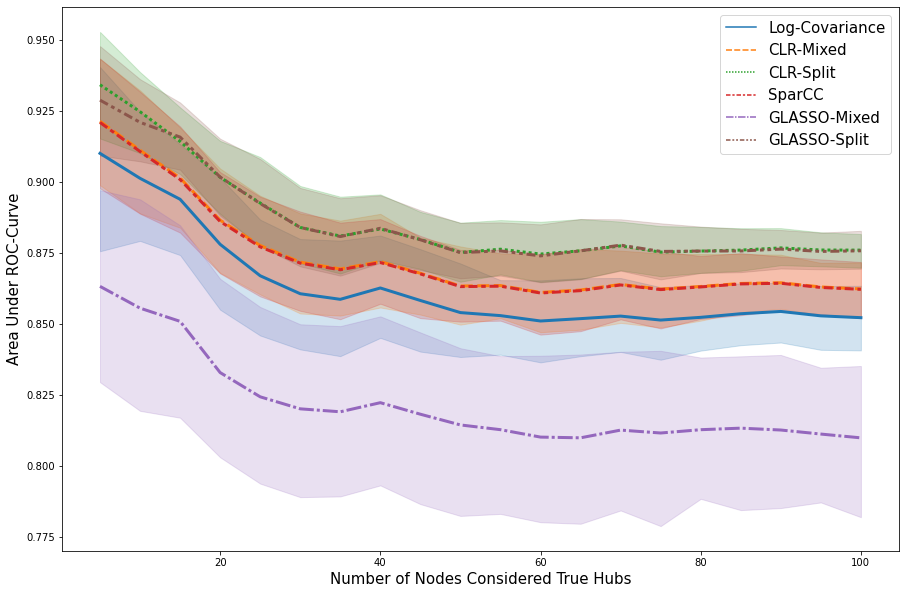

In [80]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = roc_top_hubs_N,ax = ax,linewidth=3)
ax.set_ylabel("Area Under ROC-Curve",size = 15)
ax.set_xlabel("Number of Nodes Considered True Hubs",size = 15)
plt.legend(fontsize=15)

In [84]:
test_net = "GLASSO-Split"
significance_df = pd.DataFrame(index = roc_top_hubs_N.index,columns = roc_top_hubs_N.columns.unique())
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(roc_top_hubs_N.loc[rw,test_net],roc_top_hubs_N.loc[rw,col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
5           0.3468  0.634214  0.706864  0.616146     0.005659          1.0
10        0.196941   0.47535  0.734234  0.456721     0.004095          1.0
15        0.088858  0.215906  0.863302   0.20131     0.002738          1.0
20        0.097878  0.211688  0.993631   0.19867     0.001136          1.0
25        0.078389  0.245559  0.987622  0.231016     0.000972          1.0
30        0.077005  0.316034  0.999637  0.303589     0.001307          1.0
35        0.094169  0.325671  0.985728  0.315804     0.001678          1.0
40        0.083569  0.267881  0.978924  0.256381     0.001513          1.0
45        0.059308  0.212177  0.990489  0.206163     0.000998          1.0
50         0.04537  0.190097  0.990827  0.184528     0.000807          1.0
55        0.013357  0.142339  0.934139  0.137034     0.000441          1.0
60        0.022688  0.175339  0.935306  0.170508     0.000712          1.0
65        0.016818  0.157952  0.999081  0.152646     0.000598          1.0
70        0.005921  0.102115  0.967853  0.098909     0.000399          1.0
75        0.008021   0.13504  0.972029  0.131556     0.000551          1.0
80        0.005347  0.104067  0.999741  0.100987     0.000227          1.0
85        0.005051  0.120099  0.957218  0.116987     0.000207          1.0
90         0.00236    0.0677  0.932374  0.066131     0.000112          1.0
95        0.002087  0.055255   0.91776  0.053846       0.0001          1.0
100       0.002286  0.041003  0.959225    0.0408     0.000111          1.0

<AxesSubplot:>

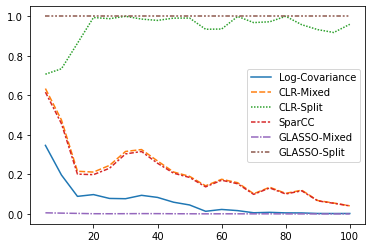

In [85]:
sb.lineplot(data = significance_df.fillna(1))

In [67]:
tr = 0

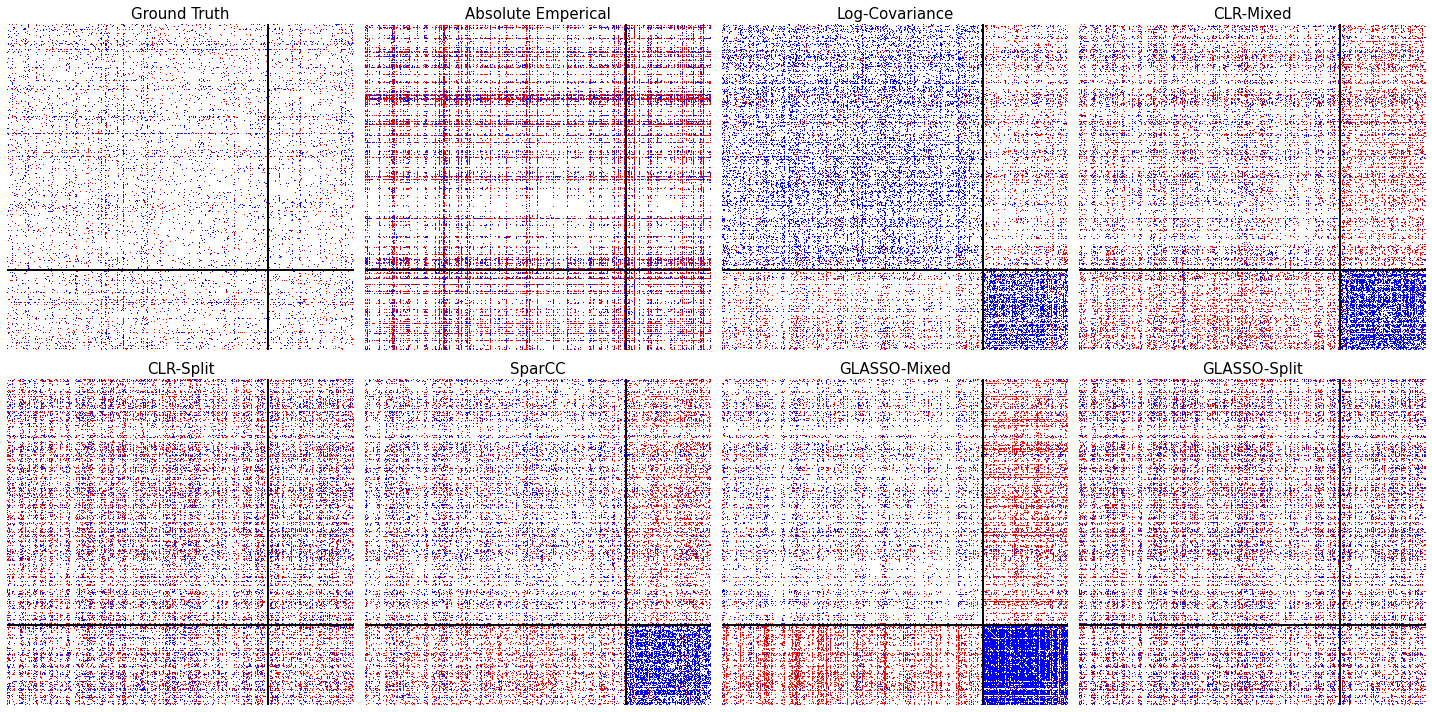

In [68]:
fig,ax = plt.subplots(2,4,figsize = (20,10),tight_layout = True)

for n,meth in enumerate(all_cov[tr].keys()):
    ax[divmod(n,4)].xaxis.set_tick_params(labelbottom=False)
    ax[divmod(n,4)].yaxis.set_tick_params(labelleft=False)

    sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax[divmod(n,4)])
    ax[divmod(n,4)].plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=2)
    ax[divmod(n,4)].plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=2)

    ax[divmod(n,4)].set_xticks([])
    ax[divmod(n,4)].set_yticks([])
    ax[divmod(n,4)].set_title(meth,fontsize=15)



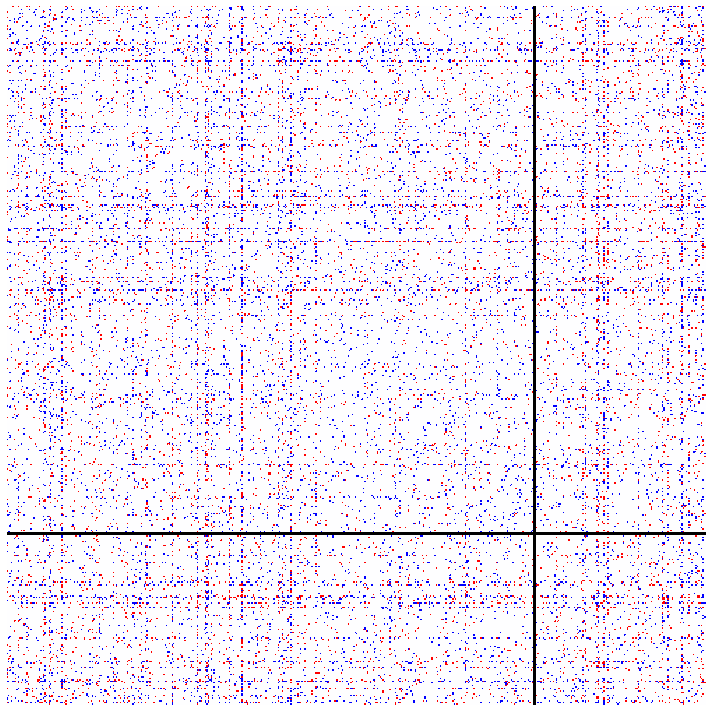

In [69]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth = "Ground Truth"

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.0),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([]);

[]

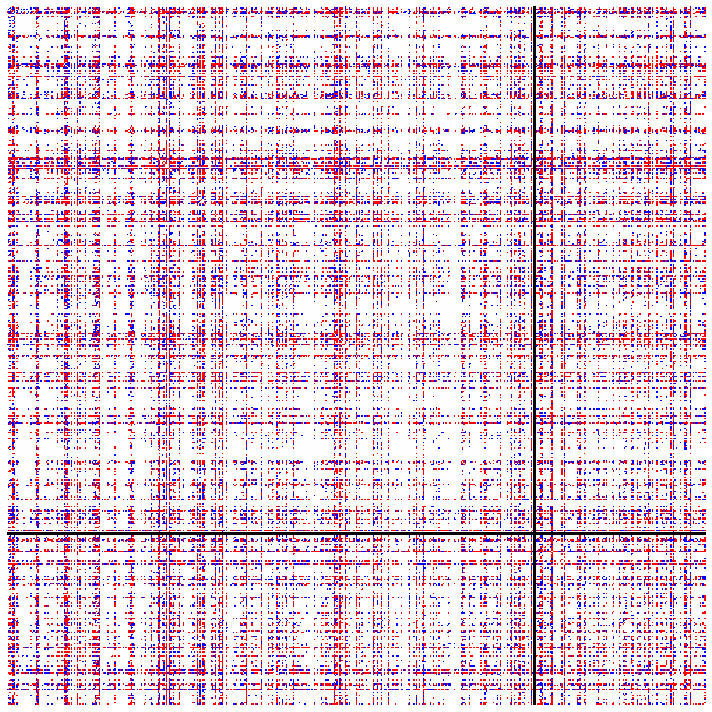

In [70]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth = 'Absolute Emperical'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

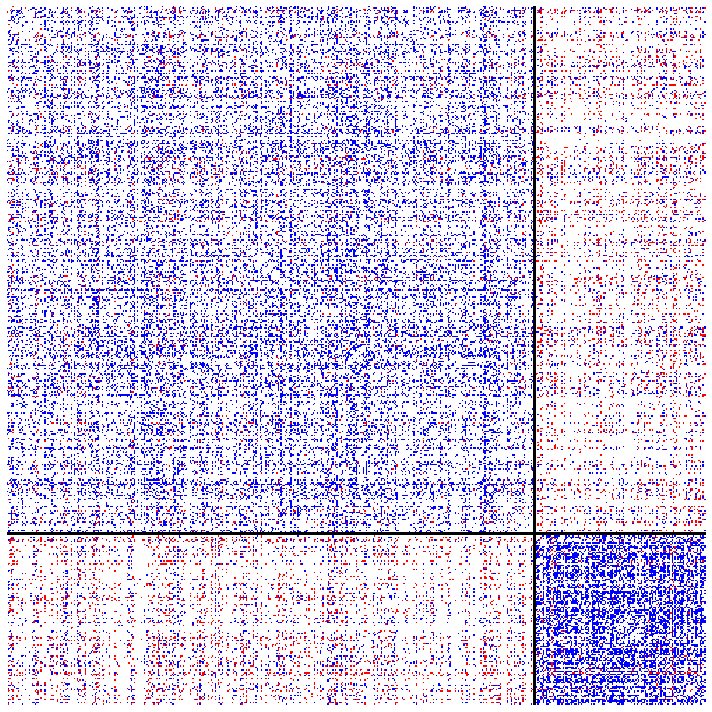

In [71]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth ='Log-Covariance'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

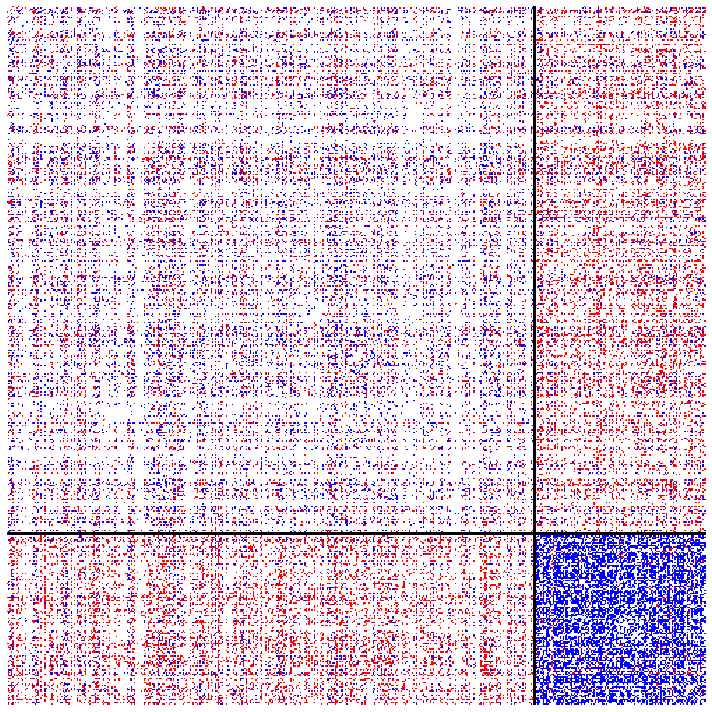

In [72]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)


meth = 'CLR-Mixed'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

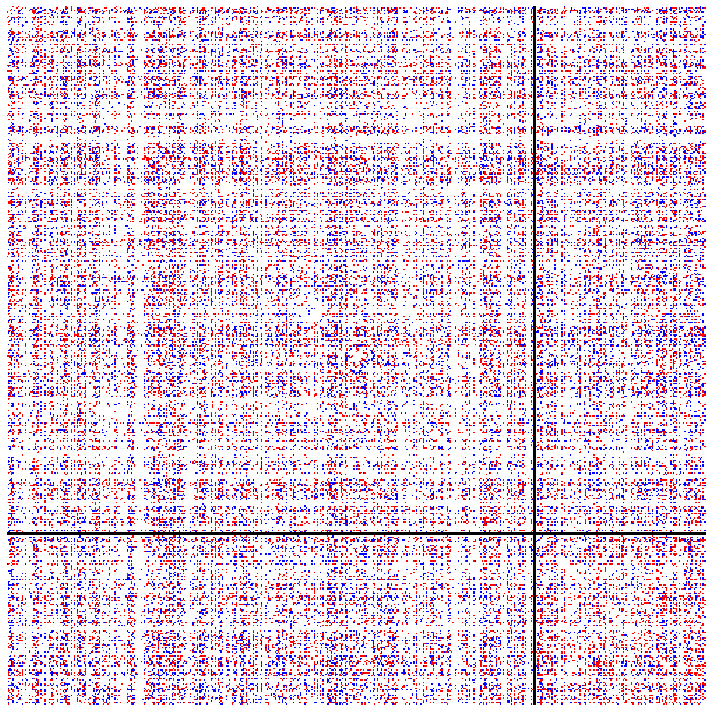

In [73]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth = 'CLR-Split'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

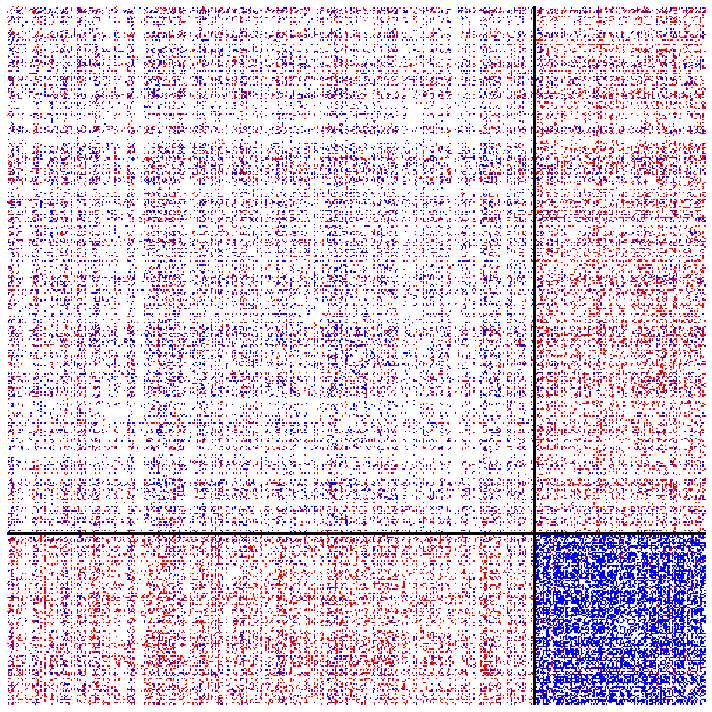

In [74]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth ='SparCC'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

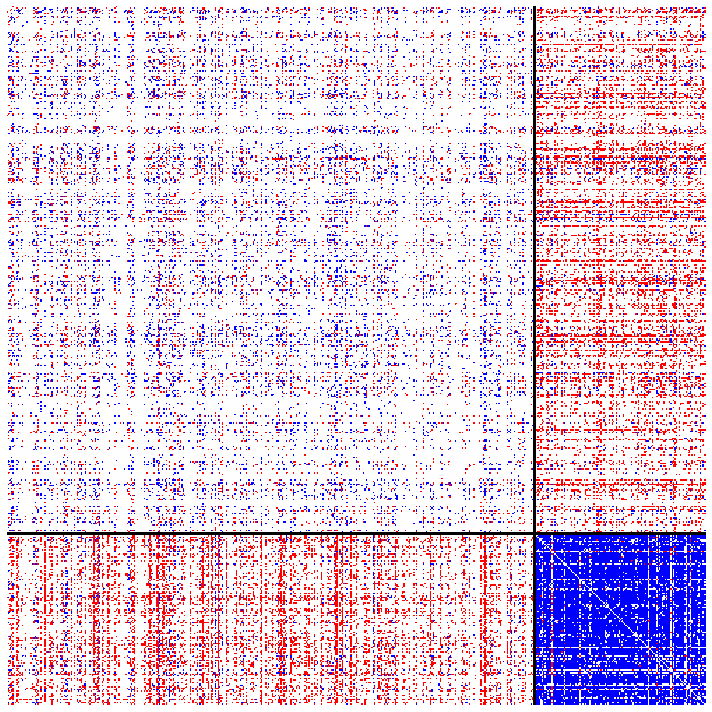

In [75]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth = 'GLASSO-Mixed'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

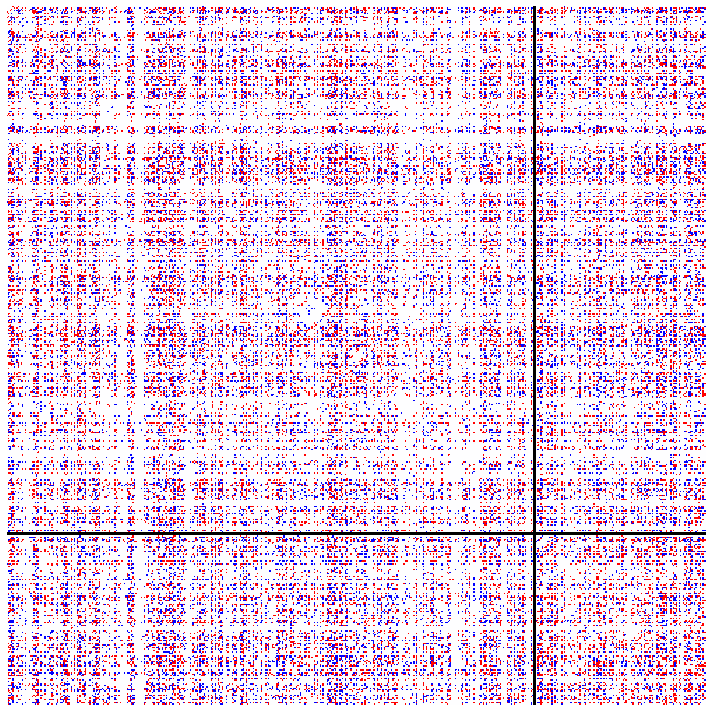

In [76]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth = 'GLASSO-Split'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

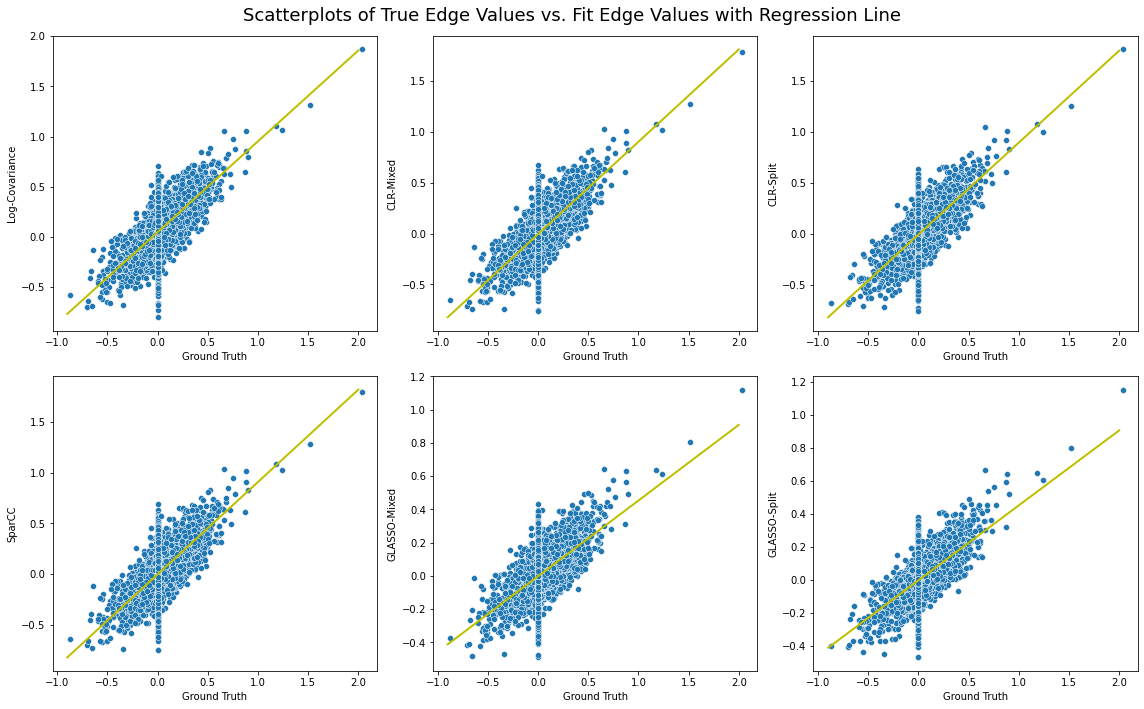

In [77]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
edge_df = make_edge_df(all_cov[tr])
fig.suptitle("Scatterplots of True Edge Values vs. Fit Edge Values with Regression Line",size=18)
for n,col in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    sb.scatterplot(data=edge_df.round(15), x="Ground Truth", y=col,ax = ax[divmod(n,3)])
    x = np.linspace(-0.9,2,1000)
    m,b = np.polyfit(edge_df["Ground Truth"],edge_df[col],1,full = False)
    ax[divmod(n,3)].plot(x,m*x+b,color = 'y',linewidth = 2)

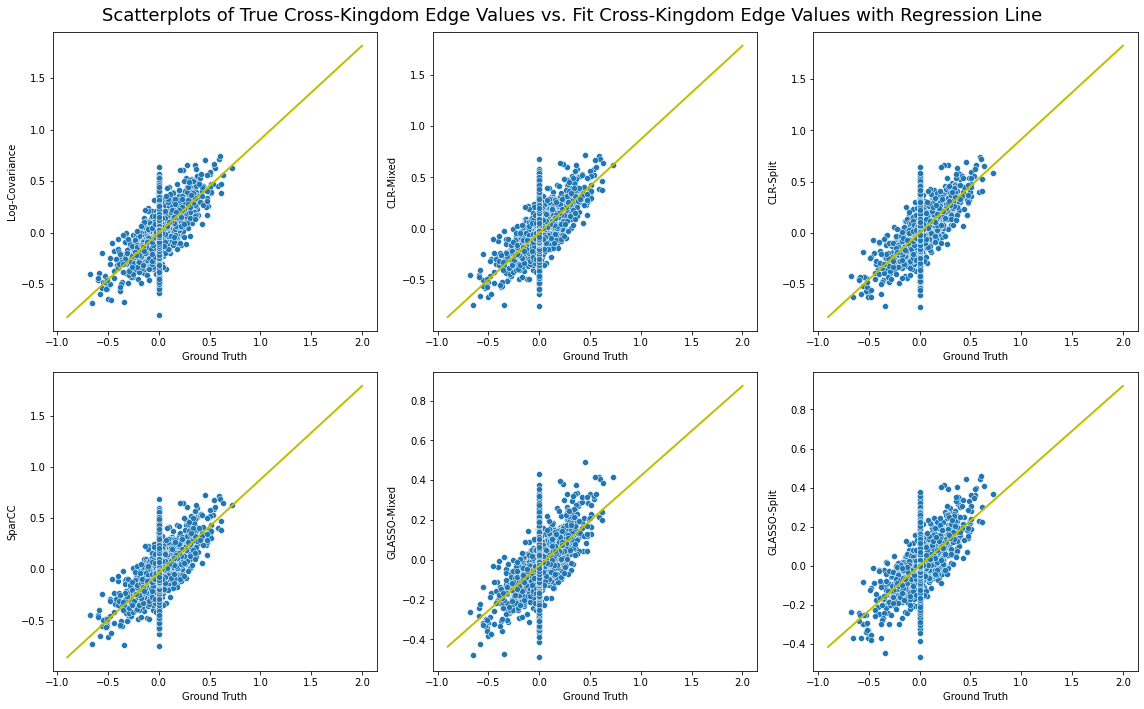

In [78]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
edge_df = make_XK_edge_df(all_cov[tr],splits.loc[tr,0])
fig.suptitle("Scatterplots of True Cross-Kingdom Edge Values vs. Fit Cross-Kingdom Edge Values with Regression Line",size=18)
for n,col in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    sb.scatterplot(data=edge_df.round(15), x="Ground Truth", y=col,ax = ax[divmod(n,3)])
    x = np.linspace(-0.9,2,1000)
    m,b = np.polyfit(edge_df["Ground Truth"],edge_df[col],1,full = False)
    ax[divmod(n,3)].plot(x,m*x+b,color = 'y',linewidth = 2)

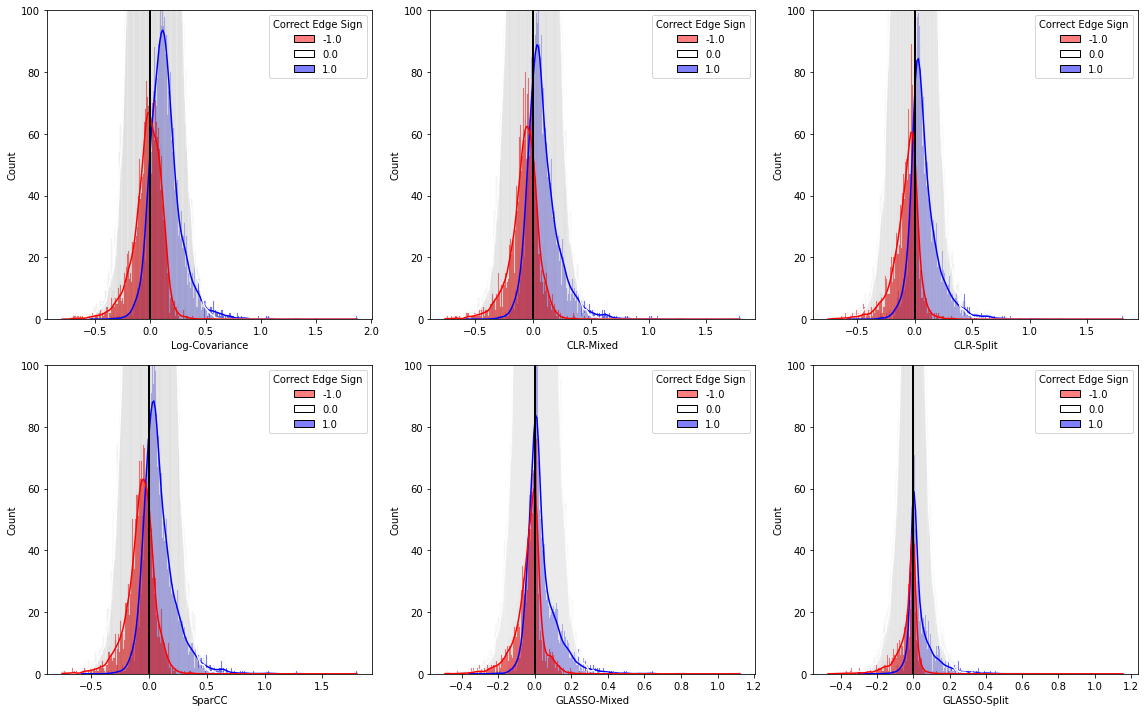

In [79]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
edge_df = make_edge_df(all_cov[tr])
edge_df["Correct Edge Sign"] = edge_df["Ground Truth"].round(8).apply(np.sign)
for n,col in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    sb.histplot(data=edge_df.round(15), x=col, hue="Correct Edge Sign",ax = ax[divmod(n,3)],kde = True,palette = "bwr_r")
    ax[divmod(n,3)].plot([0,0],[0,100],linewidth = 2,color = 'k')
    ax[divmod(n,3)].set_ybound(0,100)